### We had a good sucess in the "1.Listing the words out of a text" notebook. We wtill has Would appearing there for reason. We would like to pass the manifesto though better cleaning job. Then we can compare the outputs." ###

In [1]:

import nltk
from nltk.util import ngrams
from nltk.corpus import reuters, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

import re
import pandas as pd
from collections import Counter
from nltk.probability import FreqDist


sw = nltk.corpus.stopwords.words('english')
newStopWords = ['Would','would']
sw.extend(newStopWords)

In [2]:
nltk.download('stopwords')
sw = nltk.corpus.stopwords.words('english')
from spacy.lang.en.stop_words import STOP_WORDS
#sw=sw+STOP_WORDS
#print (sw)
SW= ((list(STOP_WORDS)+sw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chandra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
lemmatizer = WordNetLemmatizer()

In [4]:
#Corpus - A diary of wine tasinge
f = open('manifesto.txt')
manifesto = f.read()

corpus = nltk.word_tokenize(manifesto)
#corpus=webtext.words('manifesto.txt')
#print (corpus)

In [5]:
# writing a fuction to clean the wine.txt 
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in SW]
    return output

In [6]:
# writing a fuction to arrange and count words. 
def word_counter(output): 
    # if many articles involved, combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_25 = dict(Counter(processed).most_common(25))
    return top_25
   

In [7]:
Processed= word_counter(corpus)

#c_processed=[word.lower() for word in Processed if word.lower() not in SW]
top_25 = dict(Counter(Processed).most_common(25))
pd.DataFrame(list(top_25.items()), columns=['Word', 'Frequency'])


,Word,Frequency
0,society,269
1,system,234
2,people,225
3,power,160
4,human,141
5,technology,127
6,ha,120
7,leftist,115
8,need,114
9,social,98


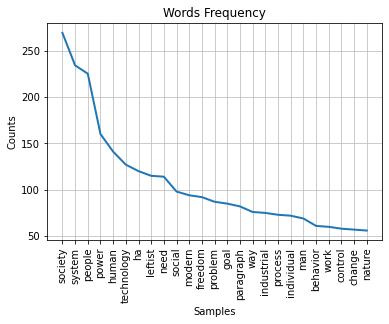

<AxesSubplot:title={'center':'Words Frequency'}, xlabel='Samples', ylabel='Counts'>

In [8]:
processed = FreqDist(Processed)
processed.plot(25, cumulative=False, title= "Words Frequency")

In [9]:
# A function to count bigrams
def bigram_counter(corpus): 
    processed = process_text(corpus)
    bigrams = ngrams(processed, n=2)
    return bigrams
  

In [10]:
bigram = bigram_counter(manifesto)
bi_processed = FreqDist(bigram)
top_25 = dict(Counter(bi_processed).most_common(25))
top_25


{('power', 'process'): 56,
 ('surrogate', 'activity'): 39,
 ('need', 'power'): 35,
 ('industrial', 'society'): 30,
 ('human', 'behavior'): 30,
 ('industrial', 'system'): 28,
 ('modern', 'society'): 24,
 ('human', 'race'): 20,
 ('modern', 'man'): 18,
 ('genetic', 'engineering'): 18,
 ('large', 'organization'): 15,
 ('form', 'society'): 14,
 ('satisfy', 'need'): 14,
 ('modern', 'leftism'): 12,
 ('drive', 'power'): 12,
 ('oversocialized', 'type'): 12,
 ('technological', 'system'): 12,
 ('industrial', 'revolution'): 11,
 ('th', 'century'): 11,
 ('primitive', 'man'): 11,
 ('advertising', 'marketing'): 11,
 ('physical', 'necessity'): 10,
 ('small', 'group'): 10,
 ('control', 'human'): 10,
 ('industrialtechnological', 'system'): 9}

In [11]:
dfb=pd.DataFrame(list(top_25.items()), columns=['Word', 'Frequency'])


In [12]:
print ("High Frequency Words_Gram")
print(dfb.head(10))
print('\n' * 2)
print ("Low Frequency Words_Gram")
print(dfb.tail(10))

High Frequency Words_Gram
                     Word  Frequency
0        (power, process)         56
1   (surrogate, activity)         39
2           (need, power)         35
3   (industrial, society)         30
4       (human, behavior)         30
5    (industrial, system)         28
6       (modern, society)         24
7           (human, race)         20
8           (modern, man)         18
9  (genetic, engineering)         18



Low Frequency Words_Gram
                                 Word  Frequency
15             (oversocialized, type)         12
16            (technological, system)         12
17           (industrial, revolution)         11
18                      (th, century)         11
19                   (primitive, man)         11
20           (advertising, marketing)         11
21              (physical, necessity)         10
22                     (small, group)         10
23                   (control, human)         10
24  (industrialtechnological, system)          9


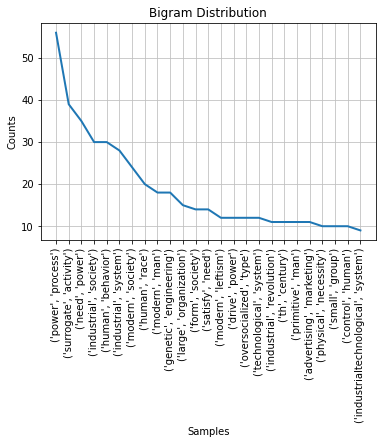

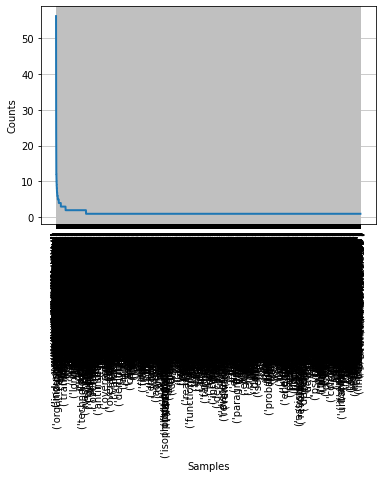

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
#analysed_word=word_counter(corpus)
bi_processed.plot(25, cumulative=False,title="Bigram Distribution")
bi_processed.plot()

There is big difference between just processing a body of test and cleaning it with NLP tools and processing. 
In this the output, words list is completely changed. Output is more relevant to the subject. The stopword "Would" too gone. 

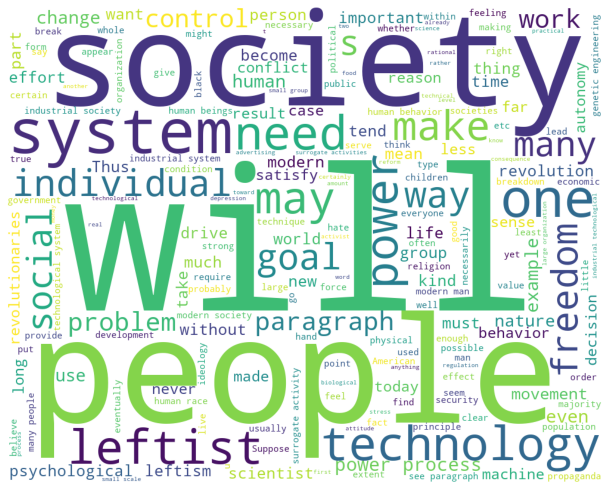

In [ ]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Unprocessed Text:
wordcloud = WordCloud(width = 1000, height = 800, background_color ='white', min_font_size = 10).generate(manifesto) 
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -1)
 
plt.show()

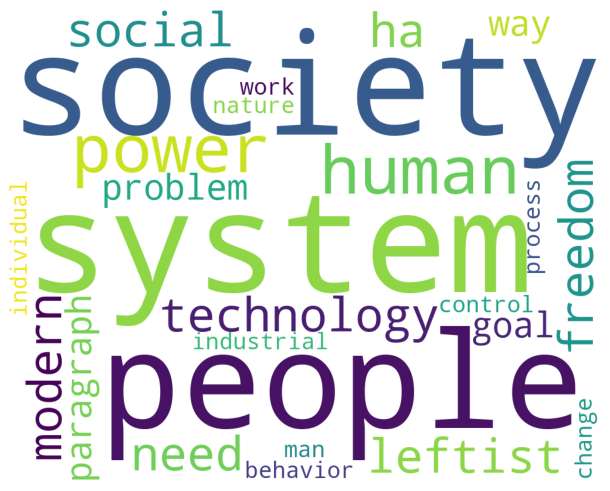

In [25]:
#processed Text

from nltk.tokenize.treebank import TreebankWordDetokenizer
text= TreebankWordDetokenizer().detokenize(processed)  
wordcloud = WordCloud(width = 1000, height = 800, background_color ='white', min_font_size = 10).generate(text) 
                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = -1)
 
plt.show()